## Monolingual Token Classification (NER) (BC2GM-IOB [EMBO-BLURB] Dataset)

Dataset Source: https://huggingface.co/datasets/EMBO/BLURB

#### Import Necessary Libraries

In [1]:
import os, sys
from collections import Counter, defaultdict
os.environ['TOKENIZERS_PARALLELISM']='false'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datasets
from datasets import load_dataset

#### Display Library Versions

In [2]:
print("Python :".rjust(18), sys.version[0:6])
print("NumPy :".rjust(18), np.__version__)
print("Pandas :".rjust(18), pd.__version__)
print("datasets :".rjust(18), datasets.__version__)

          Python : 3.9.12
           NumPy : 1.25.1
          Pandas : 2.0.3
        datasets : 2.13.1


#### Ingest English Subset of Dataset

In [3]:
ds = load_dataset("EMBO/SourceData")

ds = ds.remove_columns(['tag_mask', 'text'])

ds = ds.rename_columns(
    {
        "words": "tokens",
        "labels": "tags"})

ds

Found cached dataset source_data (/Users/briandunn/.cache/huggingface/datasets/EMBO___source_data/NER/0.0.0/7898ea3b9a5c23a2cf35c5bac8353dfa312569800a92b13b4035de62ba832a15)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 55250
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 6844
    })
    validation: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 7951
    })
})

#### Example

In [4]:
example = ds['train'][12]

example

{'tokens': ['B',
  '.',
  'Proteins',
  'extracted',
  'from',
  'transgenic',
  'plants',
  'expressing',
  'YFP',
  '-',
  'CPL1',
  'in',
  'Col',
  '-',
  '0',
  'or',
  'free1',
  '-',
  'ctmut',
  'background',
  'were',
  'used',
  'for',
  'IP',
  'with',
  'GFP',
  '-',
  'trap',
  'followed',
  'by',
  'immunoblotting',
  'analysis',
  'with',
  'indicated',
  'antibodies',
  '.'],
 'tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  13,
  0,
  3,
  0,
  0,
  0,
  0,
  13,
  0,
  0,
  0,
  0,
  0]}

#### Display Feature Information About Each Feature

In [5]:
for k, v in ds["train"].features.items():
    print(f"{k}: \n{v}\n")

tokens: 
Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)

tags: 
Sequence(feature=ClassLabel(names=['O', 'B-SMALL_MOLECULE', 'I-SMALL_MOLECULE', 'B-GENEPROD', 'I-GENEPROD', 'B-SUBCELLULAR', 'I-SUBCELLULAR', 'B-CELL_TYPE', 'I-CELL_TYPE', 'B-TISSUE', 'I-TISSUE', 'B-ORGANISM', 'I-ORGANISM', 'B-EXP_ASSAY', 'I-EXP_ASSAY', 'B-DISEASE', 'I-DISEASE', 'B-CELL_LINE', 'I-CELL_LINE'], id=None), length=-1, id=None)



#### Convert to Pandas DataFrame

In [6]:
ds.set_format(type="pandas")

df = pd.concat([ds['train'][:], ds['test'][:], ds['validation'][:]])

df = df.dropna()

df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70045 entries, 0 to 70044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  70045 non-null  object
 1   tags    70045 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


#### Define Tag Values & Conversions Between String & Integer Values

In [7]:
tag_values = ds['train'].features[f'tags'].feature.names
NUM_OF_LABELS = len(tag_values)

label2id = {tag: idx for idx, tag in enumerate(tag_values)}
id2label = {idx: tag for idx, tag in enumerate(tag_values)}

print(f"List of tag values: \n{tag_values}")
print(f"Number of NER Tags: \n{NUM_OF_LABELS}")
print(f"id2label: \n{id2label}")
print(f"label2id: \n{label2id}")

List of tag values: 
['O', 'B-SMALL_MOLECULE', 'I-SMALL_MOLECULE', 'B-GENEPROD', 'I-GENEPROD', 'B-SUBCELLULAR', 'I-SUBCELLULAR', 'B-CELL_TYPE', 'I-CELL_TYPE', 'B-TISSUE', 'I-TISSUE', 'B-ORGANISM', 'I-ORGANISM', 'B-EXP_ASSAY', 'I-EXP_ASSAY', 'B-DISEASE', 'I-DISEASE', 'B-CELL_LINE', 'I-CELL_LINE']
Number of NER Tags: 
19
id2label: 
{0: 'O', 1: 'B-SMALL_MOLECULE', 2: 'I-SMALL_MOLECULE', 3: 'B-GENEPROD', 4: 'I-GENEPROD', 5: 'B-SUBCELLULAR', 6: 'I-SUBCELLULAR', 7: 'B-CELL_TYPE', 8: 'I-CELL_TYPE', 9: 'B-TISSUE', 10: 'I-TISSUE', 11: 'B-ORGANISM', 12: 'I-ORGANISM', 13: 'B-EXP_ASSAY', 14: 'I-EXP_ASSAY', 15: 'B-DISEASE', 16: 'I-DISEASE', 17: 'B-CELL_LINE', 18: 'I-CELL_LINE'}
label2id: 
{'O': 0, 'B-SMALL_MOLECULE': 1, 'I-SMALL_MOLECULE': 2, 'B-GENEPROD': 3, 'I-GENEPROD': 4, 'B-SUBCELLULAR': 5, 'I-SUBCELLULAR': 6, 'B-CELL_TYPE': 7, 'I-CELL_TYPE': 8, 'B-TISSUE': 9, 'I-TISSUE': 10, 'B-ORGANISM': 11, 'I-ORGANISM': 12, 'B-EXP_ASSAY': 13, 'I-EXP_ASSAY': 14, 'B-DISEASE': 15, 'I-DISEASE': 16, 'B-CELL_LIN

In [8]:
df.head()

,tokens,tags
0,"[B, ., Yeast, two, -, hybrid, analysis, of, th...","[0, 0, 13, 14, 14, 14, 0, 0, 0, 13, 0, 3, 0, 0..."
1,"[C, ., BiFC, assay, to, verify, the, interacti...","[0, 0, 13, 0, 0, 0, 0, 13, 0, 3, 0, 3, 0, 0, 0..."
2,"[D, ., Co, -, immunoprecipitation, analysis, o...","[0, 0, 13, 14, 14, 0, 0, 13, 0, 3, 0, 3, 0, 3,..."
3,"[E, ., Co, -, immunoprecipitation, analysis, o...","[0, 0, 13, 14, 14, 0, 0, 0, 0, 0, 3, 0, 0, 0, ..."
4,"[B, ., Small, RNA, gel, blots, for, 7, -, day,...","[0, 0, 13, 14, 14, 14, 0, 0, 0, 0, 0, 0, 11, 0..."


#### Visual: Histogram of Input Lengths

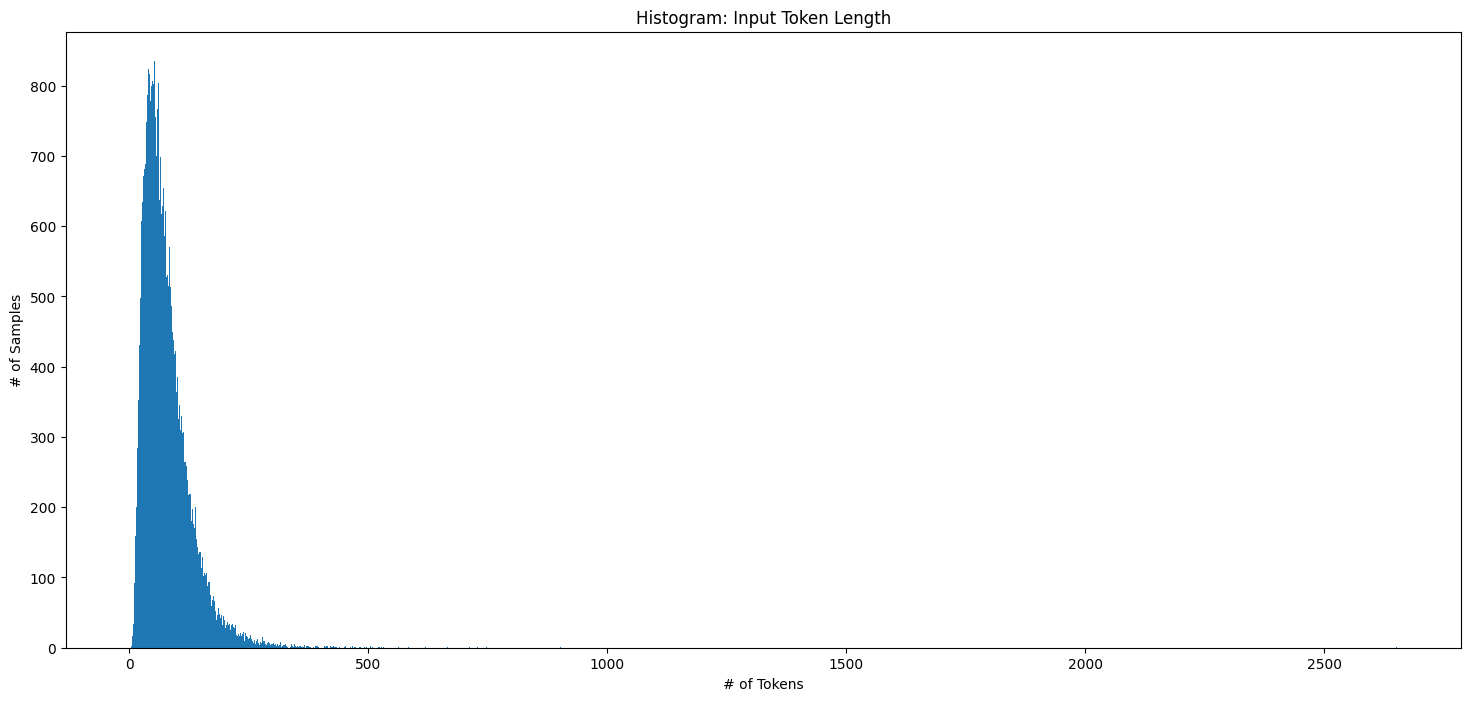

The maximum number of tokens is 2651.


In [9]:
df['tokens_count'] = df['tokens'].str.len()

MAX_INPUT_TOKENS = max(df['tokens_count'])

n_bin=MAX_INPUT_TOKENS + 1
df.hist('tokens_count', 
          grid=False, 
          figsize=(18,8), 
          range=(0,n_bin + 1), 
          bins=n_bin + 1)
plt.title('Histogram: Input Token Length')
plt.xlabel('# of Tokens')
plt.ylabel('# of Samples')
plt.show()

print(f"The maximum number of tokens is {MAX_INPUT_TOKENS}.")

#### Prepare Dataset for Class Distribution Visual(s)

In [10]:
def count_numbers(numbers_list): 
    number_counts = Counter(numbers_list) 
    return number_counts

df['tags'] = df['tags'].tolist()
df['number_counts'] = df['tags'].apply(lambda x: count_numbers(x))
df['number_counts'] = df['number_counts'].apply(lambda x: dict(x))

sum_dict = defaultdict(int)

for lst in df['number_counts']:
    # Iterate over the dictionaries in the list and sum the values
    for dct in lst:
        sum_dict[dct] += lst[dct]

sum_dict = dict(sum_dict)

key_values = list(sum_dict.keys())
key_values.sort()
sorted_dict = {i: sum_dict[i] for i in key_values}

class_frequencies = dict(zip((id2label.values()), (sorted_dict.values())))

class_frequencies

{'O': 4625696,
 'B-SMALL_MOLECULE': 73529,
 'I-SMALL_MOLECULE': 25873,
 'B-GENEPROD': 256125,
 'I-GENEPROD': 60676,
 'B-SUBCELLULAR': 39382,
 'I-SUBCELLULAR': 9928,
 'B-CELL_TYPE': 27345,
 'I-CELL_TYPE': 10080,
 'B-TISSUE': 35647,
 'I-TISSUE': 10103,
 'B-ORGANISM': 42892,
 'I-ORGANISM': 11698,
 'B-EXP_ASSAY': 116540,
 'I-EXP_ASSAY': 74013,
 'B-DISEASE': 6375,
 'I-DISEASE': 2283,
 'B-CELL_LINE': 25327,
 'I-CELL_LINE': 12862}

#### Visual: Bar Plot of Class Distribution

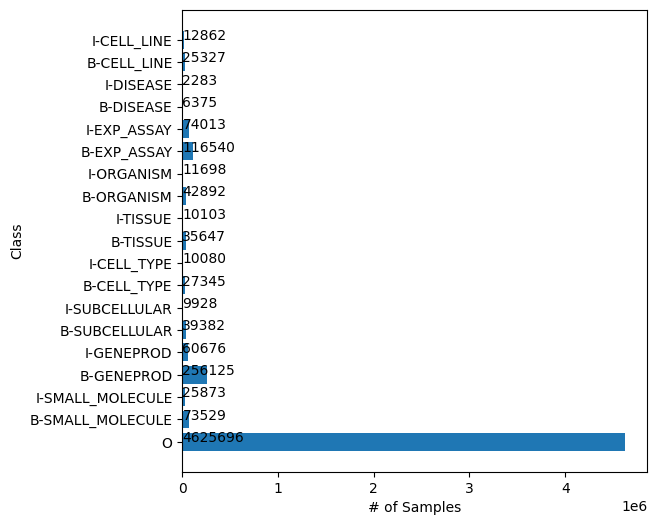

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(1250, i, y[i], ha = 'left', **{'color': 'black'})

class_names = list(class_frequencies.keys())
values = list(class_frequencies.values())

plt.figure(figsize=(6, 6))
plt.barh(range(len(class_names)), values, tick_label=class_names)
addlabels(class_names, values)
plt.suptitle('')
plt.ylabel('Class')
plt.xlabel('# of Samples')
plt.xticks(rotation = 0)
plt.show()

#### Visual: Bar Plot of Class Distribution After Removing 'O'

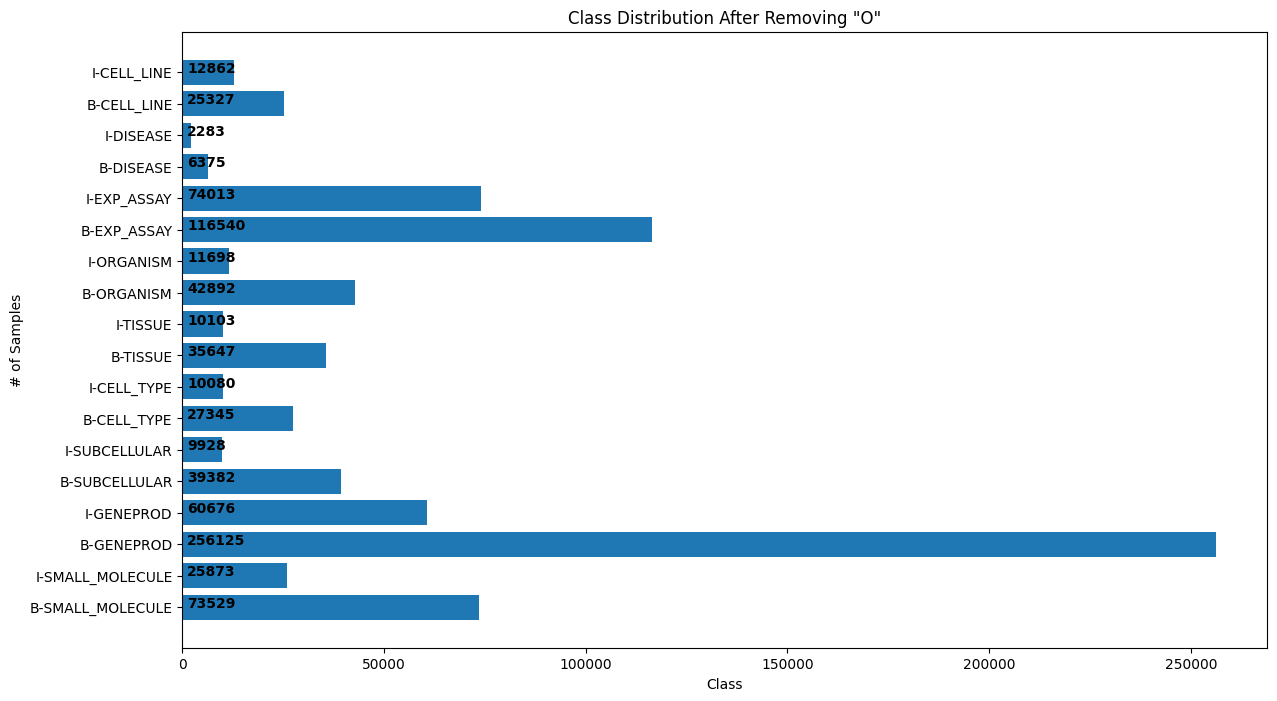

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(1250, i, y[i], ha = 'left', **{'color': 'black', 'fontweight': 'bold'})

if 'O' in class_frequencies.keys():
    del class_frequencies['O']

class_names = list(class_frequencies.keys())
values = list(class_frequencies.values())

plt.figure(figsize=(14, 8))
plt.barh(range(len(class_names)), values, tick_label=class_names)
addlabels(class_names, values)
plt.suptitle('')
plt.title('Class Distribution After Removing "O"')
plt.xlabel('Class')
plt.ylabel('# of Samples')
plt.xticks(rotation = 0)
plt.show()